# Assignement 1
## Digital Musicology

@authors: JorisMonnet, Pannnnestrella, YutakaOsaki, Yiwei Liu

Due Date: 27/03/2024

In [1]:
pip install music21


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Task A: Timing Function

/Users/osakiyutaka/.pyenv/versions/3.10.4/lib/python3.10/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


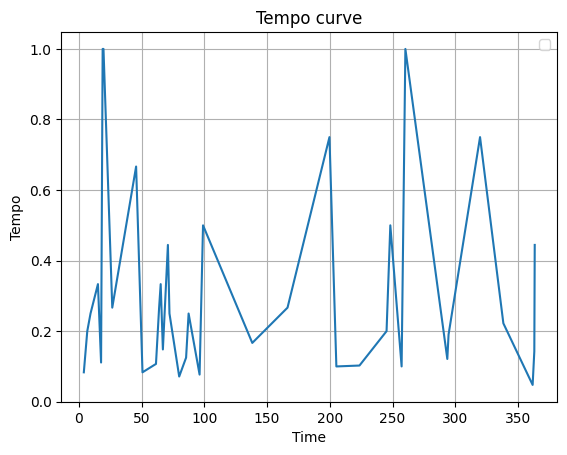

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


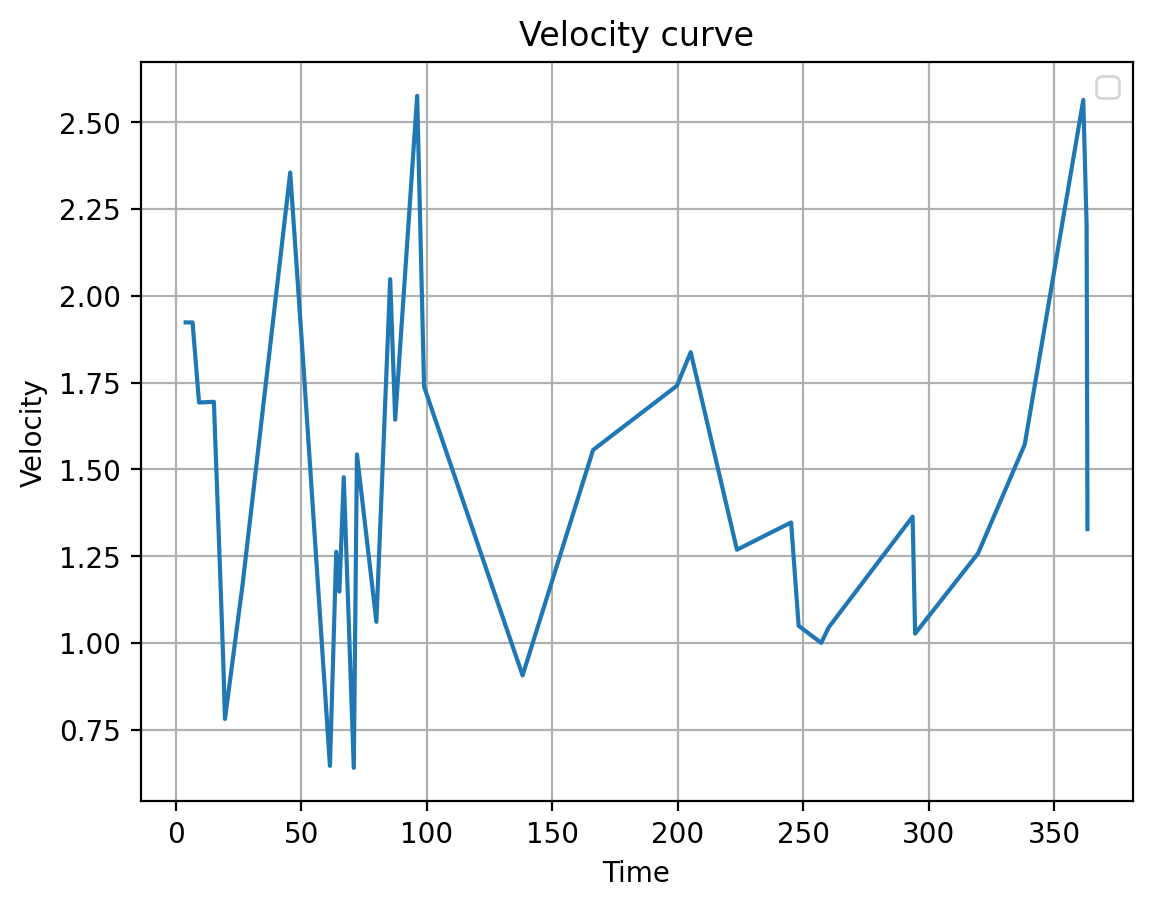

In [2]:
# TODO: plot the two plots from the timing file
import matplotlib.pyplot as plt
import music21


def timing(unperformed_midi_path: str, performed_midi_path: str) -> dict and dict:
    """
    Maps symbolic time to performance attributes (tempo,velocity),
    so that one can use it to transform the "unperformed" MIDI to the "performed" MIDI.
    :param unperformed_midi_path: str
    :param performed_midi_path: str
    :return: tempo_maps, velocity_maps
    """
    music21_midi_unperformed = music21.converter.parse(unperformed_midi_path)
    music21_midi_performed = music21.converter.parse(performed_midi_path)

    times = {}
    velocities = {}
    tempo_mapping = {}
    velocity_mapping = {}

    for note in music21_midi_unperformed.flat.notes:
        times[note.offset] = note.duration.quarterLength
        velocities[note.offset] = note.volume.velocity

    for note in music21_midi_performed.flat.notes:
        if note.offset in times:
            tempo_mapping[note.offset] = note.duration.quarterLength / times[note.offset]
            velocity_mapping[note.offset] = note.volume.velocity / velocities[note.offset]

    return tempo_mapping, velocity_mapping


def plot_timing_as_tempo_curve(tempo_map: dict):
    """
    Plot the tempo_map from timing function as a tempo curve.
    :param tempo_map: dict
    :return: None
    """
    fig, ax = plt.subplots()
    ax.plot(list(tempo_map.keys()), list(tempo_map.values()))
    ax.set(xlabel='Time', ylabel='Tempo',
           title='Tempo curve')
    ax.grid()
    ax.legend()
    plt.show()


def plot_timing_as_velocity_curve(velocity_map: dict):
    """
    Plot the velocity_map from the function timing as a velocity curve.
    :param velocity_map: dict
    :return: None
    """
    fig, ax = plt.subplots()
    ax.plot(list(velocity_map.keys()), list(velocity_map.values()))
    ax.set(xlabel='Time', ylabel='Velocity',
           title='Velocity curve')
    ax.grid()
    ax.legend()
    plt.show()


# TODO remove this main, only useful for testing Task A
if __name__ == "__main__":
    tempo_maps, velocity_maps = timing("/Users/osakiyutaka/Library/Mobile Documents/com~apple~CloudDocs/Master/EPFL/Spring Semester/Digital Musicology/DM_Assignement1-main/asap-dataset/MunA04.mid",
                                       "/Users/osakiyutaka/Library/Mobile Documents/com~apple~CloudDocs/Master/EPFL/Spring Semester/Digital Musicology/DM_Assignement1-main/asap-dataset/Stahievitch02.mid")
    plot_timing_as_tempo_curve(tempo_maps)
    plot_timing_as_velocity_curve(velocity_maps)

## Task B: Empirical findings

### 1. Subcorpus Analysis

In [3]:
import pandas as pd

In [44]:
columns = ["start", "end", "b"]
WuuE02M_scores = pd.read_table('/Users/osakiyutaka/Library/Mobile Documents/com~apple~CloudDocs/Master/EPFL/Spring Semester/Digital Musicology/DM_Assignement1-main/asap-dataset/WuuE02M_annotations.txt', sep='\t', names=columns)
tet_scores = pd.read_table('/Users/osakiyutaka/Library/Mobile Documents/com~apple~CloudDocs/Master/EPFL/Spring Semester/Digital Musicology/DM_Assignement1-main/asap-dataset/TET01_annotations.txt', sep='\t', names=columns)
original_scores = pd.read_table('/Users/osakiyutaka/Library/Mobile Documents/com~apple~CloudDocs/Master/EPFL/Spring Semester/Digital Musicology/DM_Assignement1-main/asap-dataset/midi_score_annotations.txt', sep="\t", names = columns)

WuuE02M_scores["b"][0] = WuuE02M_scores["b"][0].split(",")[0]
tet_scores["b"][0] = tet_scores["b"][0].split(",")[0]
original_scores["b"][0] = original_scores["b"][0].split(",")[0]

/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_32375/539048490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WuuE02M_scores["b"][0] = WuuE02M_scores["b"][0].split(",")[0]
/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_32375/539048490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tet_scores["b"][0] = tet_scores["b"][0].split(",")[0]
/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_32375/539048490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [80]:
def get_rawdata(path):
    columns = ["start", "end", "b"]
    scores = pd.read_table(path, sep='\t', names=columns)
    scores["b"][0] = scores["b"][0].split(",")[0]
    return scores

In [140]:
MunA05M_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-3/MunA05M_annotations.txt')
WuuE04M_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-3/WuuE04M_annotations.txt')
BLINOV01_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-3/BLINOV01_annotations.txt')
Original_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-3/midi_score_annotations.txt')


/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_32375/4020022095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["b"][0] = scores["b"][0].split(",")[0]
/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_32375/4020022095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["b"][0] = scores["b"][0].split(",")[0]
/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_32375/4020022095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [113]:
def get_dis(score_name):
    list_dis = []
    for i in range(len(score_name)-1):
        list_dis.append(score_name["start"][i+1] - score_name["start"][i])
    return list_dis

In [145]:
def violinplot_eachpart(scores, original_scores):
    list_original = get_dis(original_scores)
    list_dbbb_ =  get_dis(scores)
    list_dbbb = []
    for i in range(0, len(list_dbbb_), 3):
        try:
            tmp_list = [list_dbbb_[i] - list_original[i], list_dbbb_[i+1] - list_original[i+1], list_dbbb_[i+2] - list_original[i+2]]
            list_dbbb.append(tmp_list)
        except:pass
    x, y, z = zip(*list_dbbb)
    list_labels = ["db", "2b", "3b"]
    dividing_point = [0, len(z)//4,len(z)//4*2,len(z)//4*3,len(z)]
    fig, ax = plt.subplots()
    ax.set_ylim([-0.5,  0.5])
    ax.set_title("Distribution of sound duration")
    ax.set_ylabel("shorter        -        original        -        longer")
    ax.set_xticks(np.arange(1, len(list_labels) + 1), labels=list_labels)
    ax.violinplot([list(x), list(y), list(z)])
    for i in range(len(dividing_point)-1):
        list_all = [list(x)[dividing_point[i]:dividing_point[i+1]], list(y)[dividing_point[i]:dividing_point[i+1]], list(z)[dividing_point[i]:dividing_point[i+1]]]
        fig, ax = plt.subplots()
        ax.set_ylim([-0.5,  0.5])
        ax.violinplot(list_all)
        ax.set_xticks(np.arange(1, len(list_labels) + 1), labels=list_labels)
        ax.set_title(f"distribution of sound duration in the {i+1} / 4 part")
        ax.set_ylabel("shorter        -        original        -        longer")
    return

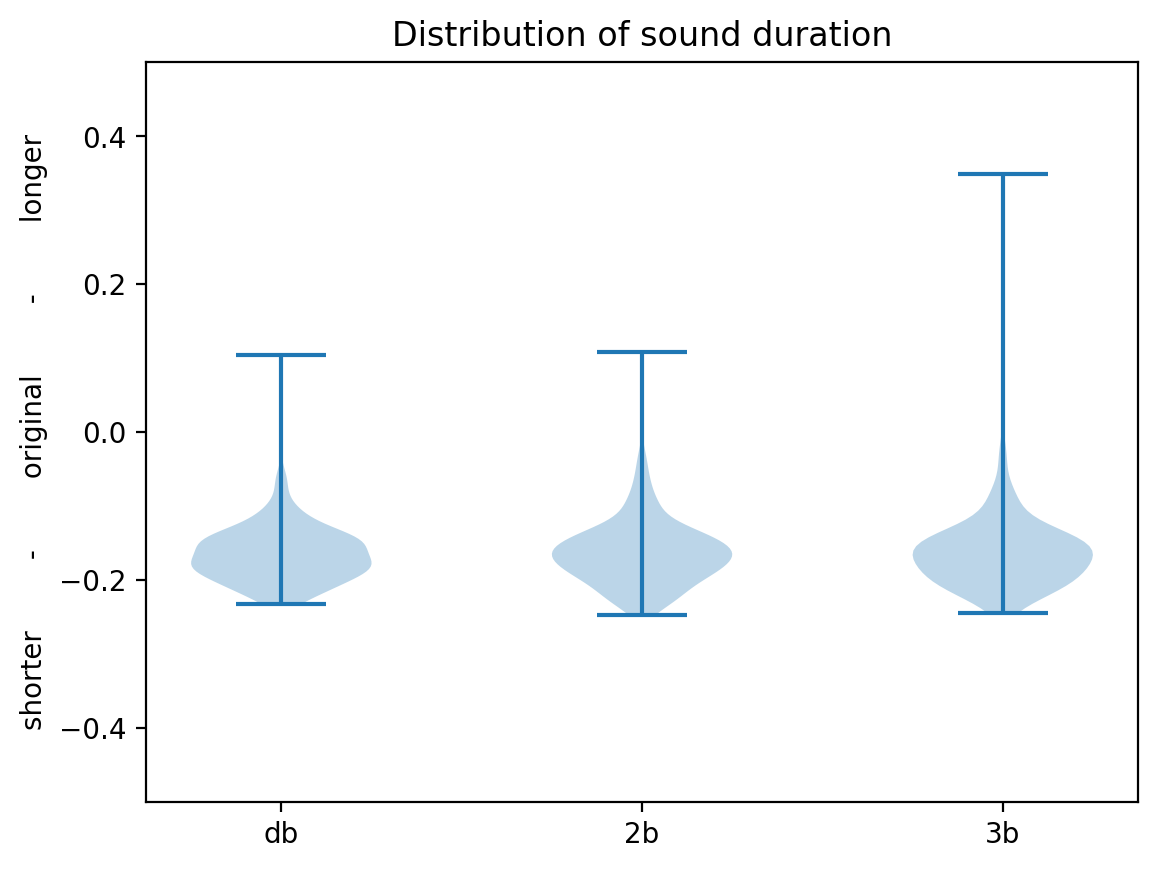

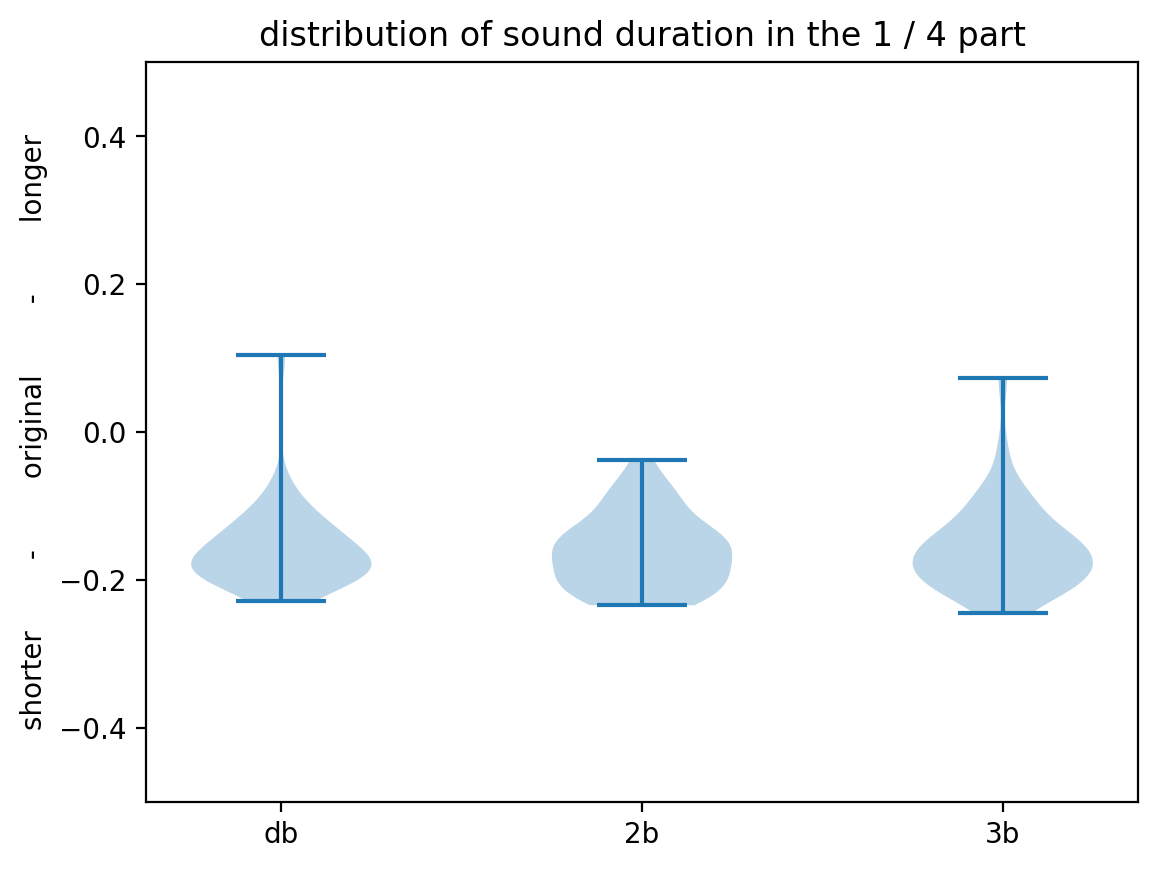

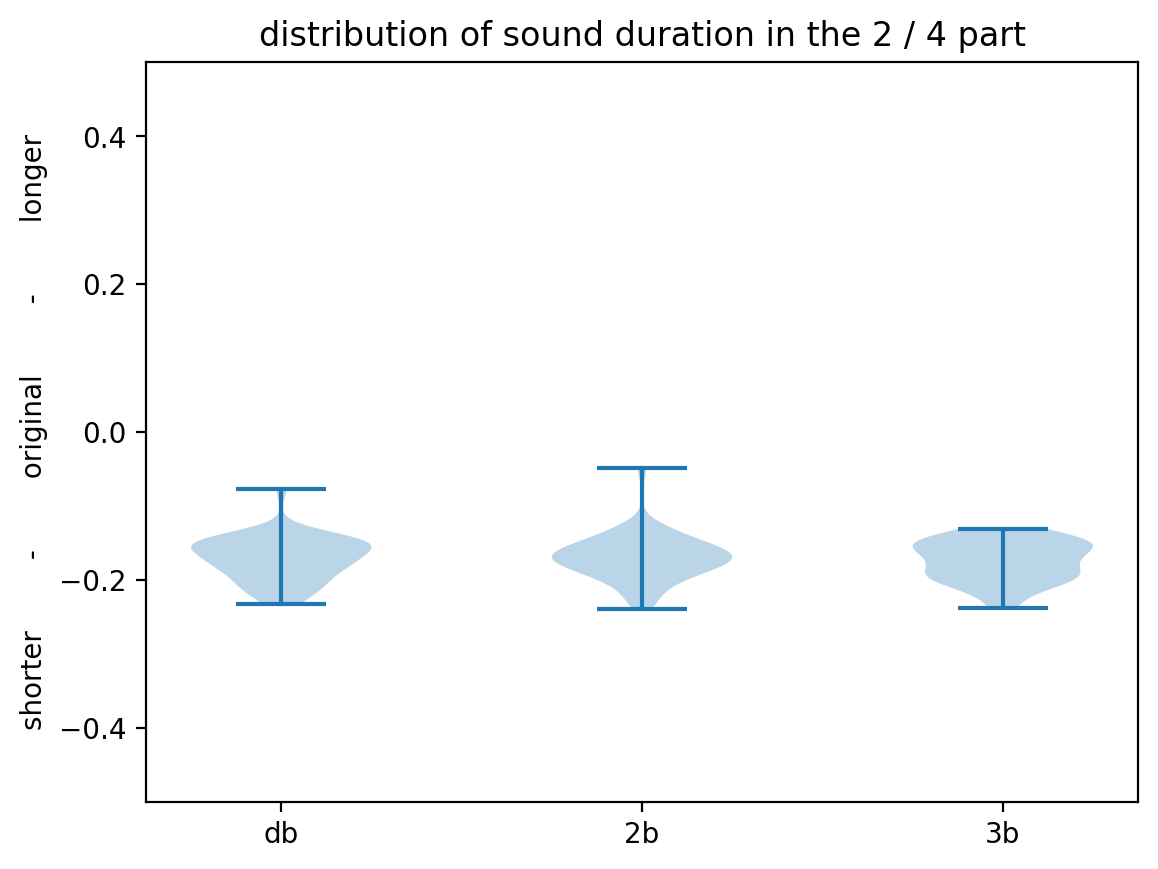

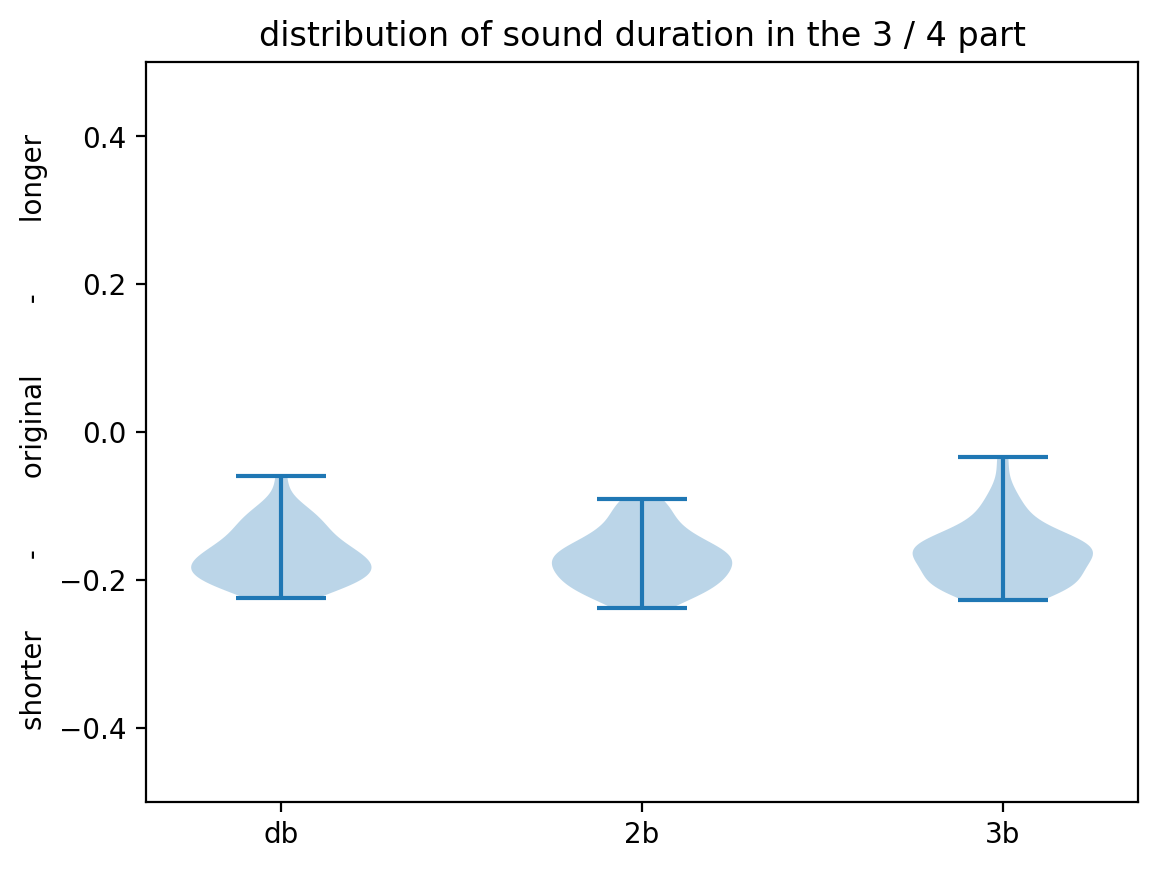

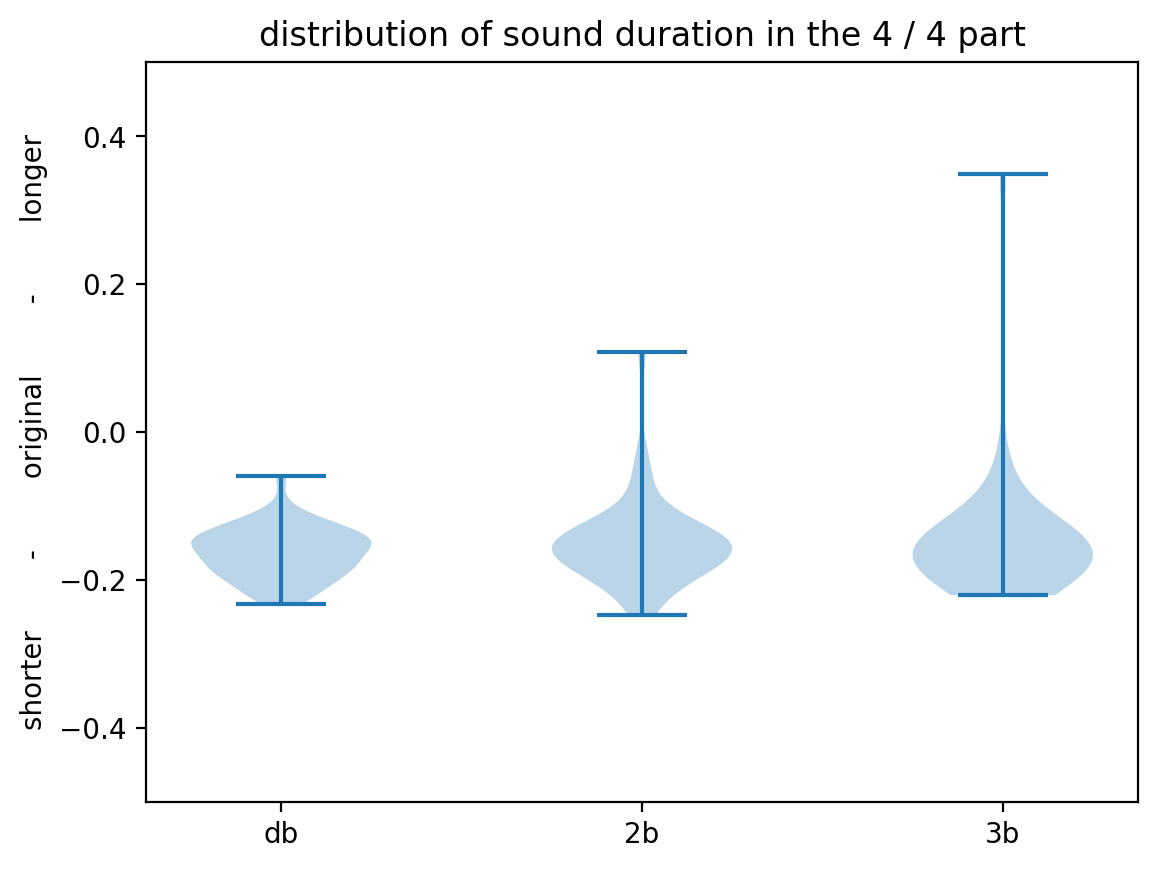

In [147]:
violinplot_eachpart(MunA05M_scores,Original_scores)

In [ ]:
# TODO:
# What is the distribution of note onsets on metrical locations? 
# Answer this question separately for different time signatures. 
# At least do 4/4 and 3/4 time signatures. Illustrate your finding with figures.

In [ ]:
# TODO:
# Where in the metrical grid are expressive timing likely to happen? 
# Support it with quantitative evidence. Illustrate your finding with figures.

In [ ]:
# TODO:
# Think about another empirical question that you can verify from this data, and present your findings.
# 
#     (Easy example) which style has the most variability in timing.

In [ ]:
# TODO:
#  (Difficult example) How well can your model generalize across different styles?

TODO: report your findings